Loading the Dataset 


In [1]:
import pandas as pd

data = pd.read_csv(r"D:\heart.csv")

print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


Exploring the Data

In [2]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [3]:
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

Data Visualisation - Histogram

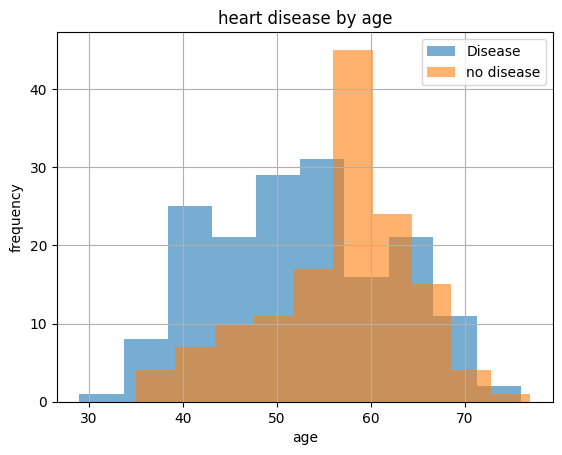

In [8]:
import matplotlib.pyplot as plt

data[data['target'] == 1]['age'].hist(alpha=0.6, label = 'Disease')
data[data['target'] == 0]['age'].hist(alpha=0.6, label = 'no disease')
plt.legend()
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('heart disease by age')
plt.show()

Preparing the Data

In [11]:
from sklearn.model_selection import train_test_split

x = data.drop('target', axis=1)
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

print("training size:", x_train.shape[0])
print("testing size:", x_test.shape[0])

training size: 242
testing size: 61


Training the Model

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 1000)
model.fit(x_train, y_train)

print("model training complete!")

model training complete!


Making Predictions

In [13]:
predictions = model.predict(x_test)
print("sample predictions:", predictions[:10])

sample predictions: [0 1 1 0 1 1 1 0 0 1]


Evaluating the Model

In [14]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predictions)
print("accuracy:", accuracy)
print(classification_report(y_test, predictions))

accuracy: 0.8852459016393442
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

